# Analysis on Air Quality in cities of india and how it affected-during Lockdown

## <img src='https://drive.google.com/uc?id=1W8T0c1amTMRP3ovuCGZZH2uiL68d98hY'>




Use the "Run" button to execute the code.

In [7]:
!pip install jovian --upgrade --quiet

import jovian

# Execute this to save new versions of the notebook
jovian.commit(project="analysis-on-quality-of-air-and-how-it-affected-during-lockdown")

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/dwivedi-rishabh95/analysis-on-quality-of-air-and-how-it-affected-during-lockdown


'https://jovian.ai/dwivedi-rishabh95/analysis-on-quality-of-air-and-how-it-affected-during-lockdown'

In [8]:
!pip install -U pandas-profiling --quiet
!pip install opendatasets pandas-profiling --upgrade --quiet

In [9]:
## Import Useful Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import matplotlib
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'
import seaborn as sns
sns.set_style("darkgrid")
import json
import folium
!pip install vincent --quiet
import vincent
!pip install plotly --upgrade --q
import plotly.express as px
import plotly.graph_objects as go

In [10]:
## Import Dataset from Kaggle

import opendatasets as od

dataset_url = 'https://www.kaggle.com/rohanrao/air-quality-data-in-india' ## Air Quality Data
cities_data= 'https://www.kaggle.com/zed9941/top-500-indian-cities'       ## 500 Cities Data

od.download(dataset_url)
od.download(cities_data)

Skipping, found downloaded files in "./air-quality-data-in-india" (use force=True to force download)
Skipping, found downloaded files in "./top-500-indian-cities" (use force=True to force download)


## **About the Data**

The **dataset** contains air quality data and AQI (Air Quality Index) at hourly and daily level of various stations across multiple cities in India.

**Cities:**

Ahmedabad, Aizawl, Amaravati, Amritsar, Bengaluru, Bhopal, Brajrajnagar, Chandigarh, Chennai, Coimbatore, Delhi, Ernakulam, Gurugram, Guwahati, Hyderabad, Jaipur, Jorapokhar, Kochi, Kolkata, Lucknow, Mumbai, Patna, Shillong, Talcher, Thiruvananthapuram, Visakhapatnam

A tutorial of how **AQI** is calculated is available here: https://www.kaggle.com/rohanrao/calculating-aqi-air-quality-index


**The data has been made publicly available by the Central Pollution Control Board**: https://cpcb.nic.in/ which is the official portal of Government of India. They also have a real-time monitoring app: https://app.cpcbccr.com/AQI_India/



In [11]:
## Reading Data from CSV file

path_1='/content/air-quality-data-in-india/city_day.csv'
path_2='/content/air-quality-data-in-india/city_hour.csv'
path_3='/content/top-500-indian-cities/cities_r2.csv'

city_day=pd.read_csv(path_1)
city_hour=pd.read_csv(path_2)
data_cities=pd.read_csv(path_3)

cd=city_day.copy()
ch=city_hour.copy()
dc=data_cities.copy()

cd.head(5)


,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


# Handling Data for analysis

In [12]:
print(cd.columns)
print(cd.City.unique())
print(cd.AQI_Bucket.unique())

Index(['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket'],
      dtype='object')
['Ahmedabad' 'Aizawl' 'Amaravati' 'Amritsar' 'Bengaluru' 'Bhopal'
 'Brajrajnagar' 'Chandigarh' 'Chennai' 'Coimbatore' 'Delhi' 'Ernakulam'
 'Gurugram' 'Guwahati' 'Hyderabad' 'Jaipur' 'Jorapokhar' 'Kochi' 'Kolkata'
 'Lucknow' 'Mumbai' 'Patna' 'Shillong' 'Talcher' 'Thiruvananthapuram'
 'Visakhapatnam']
[nan 'Poor' 'Very Poor' 'Severe' 'Moderate' 'Satisfactory' 'Good']


In [13]:
cities=cd.City.unique()
index_values=[]
for i in range(len(cities)):
  city_data=cd[cd.City==cities[i]]
  set_index=city_data.set_index('Date',inplace=True)
  date_index=city_data.apply(pd.Series.first_valid_index)
  print("First valid index for city {} is at `{}`".format(cities[i], date_index[0]))
  index_values.append(date_index[0])

First valid index for city Ahmedabad is at `2015-01-01`
First valid index for city Aizawl is at `2020-03-11`
First valid index for city Amaravati is at `2017-11-24`
First valid index for city Amritsar is at `2017-02-27`
First valid index for city Bengaluru is at `2015-01-01`
First valid index for city Bhopal is at `2019-09-17`
First valid index for city Brajrajnagar is at `2017-12-07`
First valid index for city Chandigarh is at `2019-09-02`
First valid index for city Chennai is at `2015-01-01`
First valid index for city Coimbatore is at `2019-06-12`
First valid index for city Delhi is at `2015-01-01`
First valid index for city Ernakulam is at `2020-01-22`
First valid index for city Gurugram is at `2015-11-27`
First valid index for city Guwahati is at `2019-02-16`
First valid index for city Hyderabad is at `2015-01-04`
First valid index for city Jaipur is at `2017-06-14`
First valid index for city Jorapokhar is at `2017-04-20`
First valid index for city Kochi is at `2020-01-22`
First va

Comparison of first valid index among different cities using Scatter Plot 

Text(0.5, 1.0, 'Plot to observe the Year in which we got the first valid Pollution reading of the city')

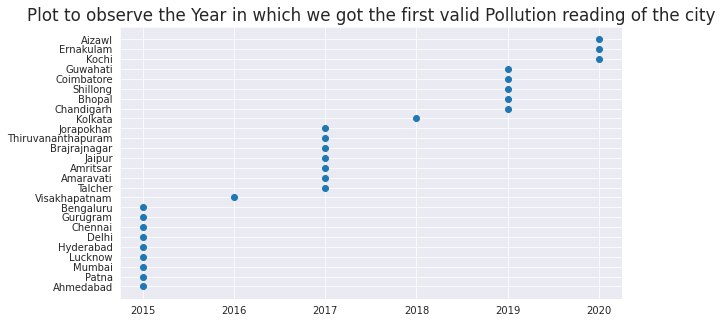

In [14]:
data_tuples = list(zip(cd.City.unique().tolist(),index_values))
Z=pd.DataFrame(data_tuples, columns=['cities','first_validIndex'])
Z.head(5)
Z['first_validIndex'] = Z['first_validIndex'].apply(pd.Timestamp)
Z['cities']=Z['cities'].astype({'cities':'category'})
#print(Z)
#print(Z.info)
Z['first_validIndex'] = pd.to_datetime(Z['first_validIndex'], format='%Y').dt.strftime('%Y')
Z.sort_values(by="first_validIndex",inplace=True)
fig, ax = plt.subplots()
plt.tick_params(axis='x',labelsize=10)
plt.tick_params(axis='y',labelsize=10)

plt.scatter('first_validIndex','cities',data=Z)
plt.title('Plot to observe the Year in which we got the first valid Pollution reading of the city')

# fig.set_size_inches(15, 6)
#plt.tick_params(axis='both',labelsize=14)
# plt.show()

**Discussion from above plot:**

1. Cities having sufficient data availability for comparison in between 2015 to 2020 :- Ahemdabad,Bengaluru,Chennai,Delhi, Gurugram,Hyderabad,Lucknow,Patna,Visakhapatnam,Patna

2.  Kolkata,Chandigarh,Jaipur are some of the major cities where data is not available for 2015,2016,2017 years for most of the pollutants , therefore are not eligible for comparison with others 

3. Bhopal,Chandigarh,Kochi,Guwhati etc. are the cities which have joined recently in air quality index tracking  i.e in 2019/2020.

In [15]:
## Handling Missing Values

A=pd.DataFrame(cd.isna().sum().sort_values(ascending=False))
A.columns=['missing_values']
A['%_of_missing_values']=A['missing_values']*100/len(cd)

A.style.background_gradient('Greens')

,missing_values,%_of_missing_values
Xylene,18109,61.322001
PM10,11140,37.723071
NH3,10328,34.973418
Toluene,8041,27.229014
Benzene,5623,19.041008
AQI_Bucket,4681,15.851139
AQI,4681,15.851139
PM2.5,4598,15.570079
NOx,4185,14.171549
O3,4022,13.619586


# Types of Pollutants and their Causes:

1. **Particulate matter (PM2.5 and PM10)** > Particulate matter is a mix of solids and liquids, including carbon, complex organic chemicals, sulphates, nitrates, mineral dust, and water suspended in the air. PM varies in size. Some particles, such as dust, soot, dirt or smoke are large or dark enough to be seen with the naked eye. But the most damaging particles are the smaller particles, known as PM10 and PM2.5.Source. The following diagram will help to understand the concept more concretely.

2. **Nitrogen Oxides (NO, NO2, NOx)** > Nitrogen oxides are a group of seven gases and compounds composed of nitrogen and oxygen, sometimes collectively known as NOx gases.The two most common and hazardous oxides of nitrogen are nitric oxide(NO) and nitrogen dioxide(NO2)

3. **Sulphur Dioxide(SO2) > Sulfur dioxide**, or SO2 is a colorless gas with a strong odor, similar to a just-struck match. It is formed when fuel containing sulfur, such as coal and oil, is burned, creating air pollution.

4. **Carbon Monoxide(CO)** > Carbon monoxide is a colorless, highly poisonous gas. Under pressure, it becomes a liquid. It is produced by burning gasoline, natural gas, charcoal, wood, and other fuels.

5. **Benzene, Toluene and Xylene (BTX)** > Benzene, toluene, xylene, and formaldehyde are well-known indoor air pollutants, especially after house decoration. They are also common pollutants in the working places of the plastic industry, chemical industry, and leather industry

6. **Ammonia( NH3)** > Ammonia pollution is pollution by the chemical ammonia (NH3) – a compound of nitrogen and hydrogen which is a byproduct of agriculture and industry.

7. **Ozone(O3)** > Ground-level ozone is a colorless and highly irritating gas that forms just above the earth's surface. It is called a "secondary" pollutant because it is produced when two primary pollutants react in sunlight and stagnant air. These two primary pollutants are nitrogen oxides (NOx) and volatile organic compounds (VOCs).


**Therefore Some pollutants given in our dataframe are clubbed together in to 7 pollutants as described above**

###**Few methods which can be used to fill nan values in our dataframe**
1. bfill= Fill nan values with next values
2. pad=Fill nan values with previous values
3. Interpolation- Linear or Polynomial interpolation can be done with boyh side limit direction to fill nan values.
4. fill_value=Replace nan values according to our observation of the data i.e Mean,Median,0 etc.  

**Here we are using linear interpolation for imputing nan values**:

In [16]:
## Fill nan Values and Combining Columns 

cd['particulate_matter']=cd['PM2.5']+cd['PM10']

cd['btx']=cd['Benzene']+cd['Toluene']+cd['Xylene']

cd['nox']=cd['NOx']+cd['NO']+cd['NO2']

cd.drop(['PM2.5','PM10','Benzene','Toluene','Xylene','NOx','NO','NO2'],axis=1,inplace=True)

cd.AQI_Bucket = cd.AQI_Bucket.fillna('Unknown')

cd.interpolate(method='linear',axis=0,limit_direction='both',inplace=True)

## Reindexing Columns 

cols= ['City','Date','particulate_matter','btx','nox','NH3','CO','SO2','O3','AQI','AQI_Bucket']

cd=cd[cols]

cd.head(5)

,City,Date,particulate_matter,btx,nox,NH3,CO,SO2,O3,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,187.58,0.02,36.29,26.64,0.92,27.64,133.36,209.0,Unknown
1,Ahmedabad,2015-01-02,187.58,12.95,33.12,26.64,0.97,24.55,34.06,209.0,Unknown
2,Ahmedabad,2015-01-03,187.58,25.45,66.40,26.64,17.40,29.07,30.70,209.0,Unknown
3,Ahmedabad,2015-01-04,187.58,15.57,38.15,26.64,1.70,18.59,36.08,209.0,Unknown
4,Ahmedabad,2015-01-05,187.58,28.68,81.28,26.64,22.10,39.33,39.31,209.0,Unknown


In [17]:
## Missing Values

Z=pd.DataFrame(cd.isna().sum().sort_values(ascending=False))
Z.columns=['missing_values']
Z['%_of_missing_values']=Z['missing_values']*100/len(cd)

Z.style.background_gradient('Greens')

,missing_values,%_of_missing_values
AQI_Bucket,0,0.000000
AQI,0,0.000000
O3,0,0.000000
SO2,0,0.000000
CO,0,0.000000
NH3,0,0.000000
nox,0,0.000000
btx,0,0.000000
particulate_matter,0,0.000000
Date,0,0.000000


**Convert** into **date time format** and form new columns of **year,month,day and weekday**

In [18]:
cd['Date'] = pd.to_datetime(cd.Date)

cd['year']=pd.DatetimeIndex(cd.Date).year
cd['month']=pd.DatetimeIndex(cd.Date).month
cd['day']=pd.DatetimeIndex(cd.Date).day
cd['weekday']=pd.DatetimeIndex(cd.Date).weekday  ## Monday-0 to Sunday-6


**Convert** some columns into **categorical** columns

In [19]:
cd = cd.astype({"City":'category', "AQI_Bucket":'category',"year":'category',"month":'category',"day":'category',"weekday":'category'})

Making new Columns of **day_type, acceptability, season** and replacing values in **AQI_Bucket** 

# <img src='https://drive.google.com/uc?id=1hZ_mKHeDWqQD1WA-0bpqSWlzVZ3bPyAk'>

In [20]:
cd['day_type']=cd.weekday.apply(lambda x:'Weekend' if x in [5,6] else 'Weekday')

cd['acceptability']=np.where(cd.AQI<=100,'Acceptable','Unacceptable')


def conditions(s):
  if s['month']==1 or s['month']==12:
    return 'Winter'
  elif s['month']==2 or s['month']==3:
    return 'Spring'
  elif s['month']==4 or s['month']==5 or s['month']==6:
    return 'Summer'
  elif s['month']==7 or s['month']==8 or s['month']==9:
    return 'Monsoon'
  else:
    return 'Autumn'

cd['season']=cd.apply(conditions,axis=1)

def conditions_accept(s):
    if (s['AQI'] <= 50):
      return 'Good'
    
    elif (s['AQI']>51) and (s['AQI']<=100):
      return 'Satisfactory'

    elif (s['AQI']>101) and (s['AQI']<=200):
      return 'Moderate'

    elif (s['AQI']>201) and (s['AQI']<=300):
      return 'Poor'

    elif (s['AQI']>301) and (s['AQI']<=400):
      return 'Very Poor'

    else:
      return 'Severe'      
     
cd['AQI_Bucket'] = cd.apply(conditions_accept, axis=1)

cd.head(5)

,City,Date,particulate_matter,btx,nox,NH3,CO,SO2,O3,AQI,AQI_Bucket,year,month,day,weekday,day_type,acceptability,season
0,Ahmedabad,2015-01-01,187.58,0.02,36.29,26.64,0.92,27.64,133.36,209.0,Poor,2015,1,1,3,Weekday,Unacceptable,Winter
1,Ahmedabad,2015-01-02,187.58,12.95,33.12,26.64,0.97,24.55,34.06,209.0,Poor,2015,1,2,4,Weekday,Unacceptable,Winter
2,Ahmedabad,2015-01-03,187.58,25.45,66.40,26.64,17.40,29.07,30.70,209.0,Poor,2015,1,3,5,Weekend,Unacceptable,Winter
3,Ahmedabad,2015-01-04,187.58,15.57,38.15,26.64,1.70,18.59,36.08,209.0,Poor,2015,1,4,6,Weekend,Unacceptable,Winter
4,Ahmedabad,2015-01-05,187.58,28.68,81.28,26.64,22.10,39.33,39.31,209.0,Poor,2015,1,5,0,Weekday,Unacceptable,Winter


Prepare data of 500 cities to **merge** with our city day **dataset** of air quality

In [21]:

cols = dc.select_dtypes(object).columns                  ##To trim all white spaces in entries of columns if any 
dc[cols] = dc[cols].apply(lambda x: x.str.strip())

replace_names = {
    'Ahmadabad': 'Ahmedabad',
    'Amravati': 'Amaravati',
    'Gurgaon': 'Gurugram',
    'Greater Mumbai': 'Mumbai',
    'Greater Hyderabad': 'Hyderabad',
}

dc['name_of_city'] = dc['name_of_city'].replace(replace_names)

selected_cols = [
    'name_of_city',
    'state_name',
    'population_total',
    'population_male',
    'population_female',
    'literates_total',
    'sex_ratio',
    'effective_literacy_rate_total',
    'location'
]


dc=dc[selected_cols]

cities=cd.City.unique()

dc=dc[dc.name_of_city.isin(cities)]


## Converting location column in to two different columns of latitude and longitude

lat_long=dc['location'].str.split(',',expand=True)

dc=pd.concat([dc,lat_long],axis=1)
dict1 = {0: 'lat',
        1: 'lon'}
dc.rename(columns=dict1,
          inplace=True)


dc.head(5)



,name_of_city,state_name,population_total,population_male,population_female,literates_total,sex_ratio,effective_literacy_rate_total,location,lat,lon
7,Ahmedabad,GUJARAT,5570585,2935869,2634716,4464303,897,89.62,"23.022505,72.5713621",23.022505,72.5713621
9,Aizawl,MIZORAM,291822,143803,148019,253588,1029,98.80,"23.727107,92.7176389",23.727107,92.7176389
24,Amaravati,MAHARASHTRA,646801,330544,316257,543568,957,93.03,"20.9374238,77.7795513",20.9374238,77.7795513
26,Amritsar,PUNJAB,1132761,602754,530007,872527,879,85.27,"31.6339793,74.8722642",31.6339793,74.8722642
72,Bengaluru,KARNATAKA,8425970,4401299,4024671,6775942,914,89.59,"12.9716,77.5946",12.9716,77.5946


**Merging** both datasets

In [22]:
dc = dc.astype({"lat": float, "lon": float})

df=pd.merge(
    left=cd,
    right=dc,
    left_on='City',
    right_on='name_of_city',
    how='outer'
)

df.head(5)

,City,Date,particulate_matter,btx,nox,NH3,CO,SO2,O3,AQI,AQI_Bucket,year,month,day,weekday,day_type,acceptability,season,name_of_city,state_name,population_total,population_male,population_female,literates_total,sex_ratio,effective_literacy_rate_total,location,lat,lon
0,Ahmedabad,2015-01-01,187.58,0.02,36.29,26.64,0.92,27.64,133.36,209.0,Poor,2015,1,1,3,Weekday,Unacceptable,Winter,Ahmedabad,GUJARAT,5570585.0,2935869.0,2634716.0,4464303.0,897.0,89.62,"23.022505,72.5713621",23.022505,72.571362
1,Ahmedabad,2015-01-02,187.58,12.95,33.12,26.64,0.97,24.55,34.06,209.0,Poor,2015,1,2,4,Weekday,Unacceptable,Winter,Ahmedabad,GUJARAT,5570585.0,2935869.0,2634716.0,4464303.0,897.0,89.62,"23.022505,72.5713621",23.022505,72.571362
2,Ahmedabad,2015-01-03,187.58,25.45,66.40,26.64,17.40,29.07,30.70,209.0,Poor,2015,1,3,5,Weekend,Unacceptable,Winter,Ahmedabad,GUJARAT,5570585.0,2935869.0,2634716.0,4464303.0,897.0,89.62,"23.022505,72.5713621",23.022505,72.571362
3,Ahmedabad,2015-01-04,187.58,15.57,38.15,26.64,1.70,18.59,36.08,209.0,Poor,2015,1,4,6,Weekend,Unacceptable,Winter,Ahmedabad,GUJARAT,5570585.0,2935869.0,2634716.0,4464303.0,897.0,89.62,"23.022505,72.5713621",23.022505,72.571362
4,Ahmedabad,2015-01-05,187.58,28.68,81.28,26.64,22.10,39.33,39.31,209.0,Poor,2015,1,5,0,Weekday,Unacceptable,Winter,Ahmedabad,GUJARAT,5570585.0,2935869.0,2634716.0,4464303.0,897.0,89.62,"23.022505,72.5713621",23.022505,72.571362


# Air Quality Data Analysis, Visuaizations and getting Insights

Let's start with our analysis by discussing problems and their Results 

 P1 **Which are the most polluted cities among the cities given in the data?**


In [23]:
avg_aqi= df[['City','AQI']].groupby('City').mean().sort_values('AQI').reset_index()

avg_aqi['AQI_Bucket']=avg_aqi.apply(conditions_accept, axis=1)

fig = px.bar(avg_aqi,
             x="City",
             y="AQI",  
             title="Average AQI from 2015-2020",
             color="AQI_Bucket")

fig.show()

**Results & Discussion**

* Among the given cities, Ahmedabad is most polluted and approximately twice as polluted as the second most polluted Delhi.

*  Ahmedabad, Delhi, Gurugram, Patna, Lucknow are the top 5 most polluted cities among which ahmedabad is in very poor bucket and rest are in poor bucket as represented by color in graph

* Cities which are in good and satisfactory conditions are mostly from Eastside and Southside cities of india.

 



## Note:

Ahmedabad seems to be exceptionally high, it may be possible that data collected from AQI measuring stations are nearby industrial area unlike compared to other cities where stations are nearby residence area , So we will keep this possibility as a Note and move a head with our Visualization  

P2 **Compare City wise pollution in all Years i.e 2015-2020**

In [24]:
df1= df[['City','AQI','year']].groupby(['City','year']).mean().reset_index()

df1 = df1.sort_values(["year", "AQI"], ascending = (True,False))

fig = px.bar(df1,
             x="City",
             y="AQI", 
             animation_frame="year", 
             animation_group="City",    
             color="City",
             range_y=[0,500],
             title='Animated bar graph to showcase year wise trend of Cities Pollution')

fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 1000
                 
fig.show()

In [25]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/dwivedi-rishabh95/analysis-on-quality-of-air-and-how-it-affected-during-lockdown


'https://jovian.ai/dwivedi-rishabh95/analysis-on-quality-of-air-and-how-it-affected-during-lockdown'

**Results & Discussion**

* In 2015 we have data of only 9 cities as represented in above animation ,this represents that some of the major cities like jaipur,guwhati,kolkata,vishakhapatnam were not collecting the data at all , which leads to major concern in future

* Ahmedabad always on Top, Delhi always on Second except in 2017 where Gurugram seems to be on top.

* Yearwise rate of increase in AQI for Patna and Gurugram is on higher side.  

* Major cities shows a decreasing trend in pollution 
after 2018 

P3 **What is the trend of different pollutants in several years?**

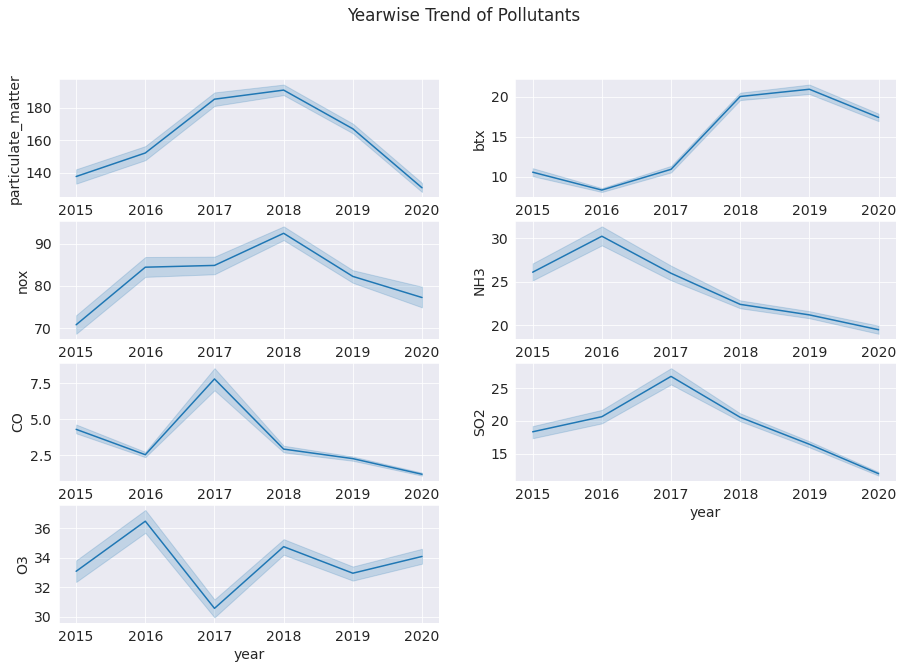

In [26]:
pollutants=['particulate_matter','btx','nox','NH3','CO',
            'SO2','O3']

fig=plt.figure(figsize=(15,10))
fig.suptitle('Yearwise Trend of Pollutants')

for i,poll  in enumerate(pollutants):
    fig.add_subplot(4,2,i+1)
    sns.lineplot(x='year',y=poll,data=df)

**Results & Discussion**

* All the pollutants showing the decresing trend after 2018 except O3 and that is a good sign ,and deeper studies needs to be done to decrease BTX and O3 pollutants   

* O3 have very fluctuating Trend , maybe because it is a secondary pollutant and based on others to vary 

* BTX is following increasing trend only , It can be a major concern in near future if not handled now , Therefor all plastic , paints and other chemical industries needs to be warned about this

P4 **What is the trend of different pollutants in several Months?**

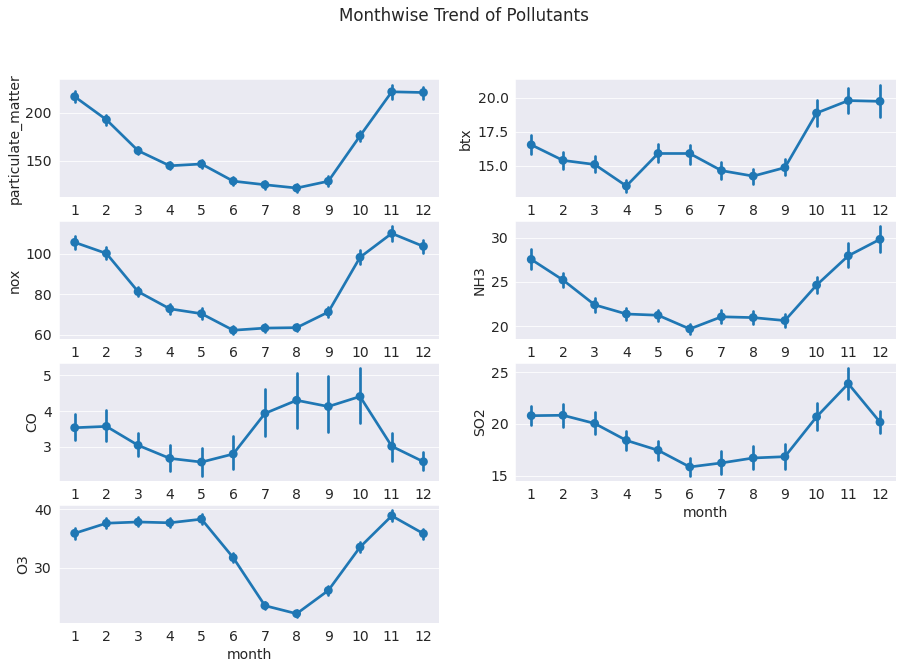

In [27]:
pollutants=['particulate_matter','btx','nox','NH3','CO',
            'SO2','O3']

fig=plt.figure(figsize=(15,10))
fig.suptitle('Monthwise Trend of Pollutants')

for i,poll  in enumerate(pollutants):
    fig.add_subplot(4,2,i+1)
    sns.pointplot(x='month',y=poll,data=df)


**Results & Discussion**

* Most of the pollutants have there least averages in June(6th) to October(10th) except CO , This may be because of rainy season of india , In these months we get heavy rains in most of the part of india and this water settle the major pollutants on ground that leads to good air quality

* O3 have steep decline in between june and september , that means it can also be stringly correlated with heavy rains. 


P5 **Show the distribution of AQI and find If there is any co-relation between poullants or with there AQI??**

In [28]:
fig = px.histogram(df, 
                   x='AQI', 
                   marginal='box', 
                   color_discrete_sequence=['green'], 
                   title='Distribution of AQI')

fig.update_layout(bargap=0.3)
fig.show()

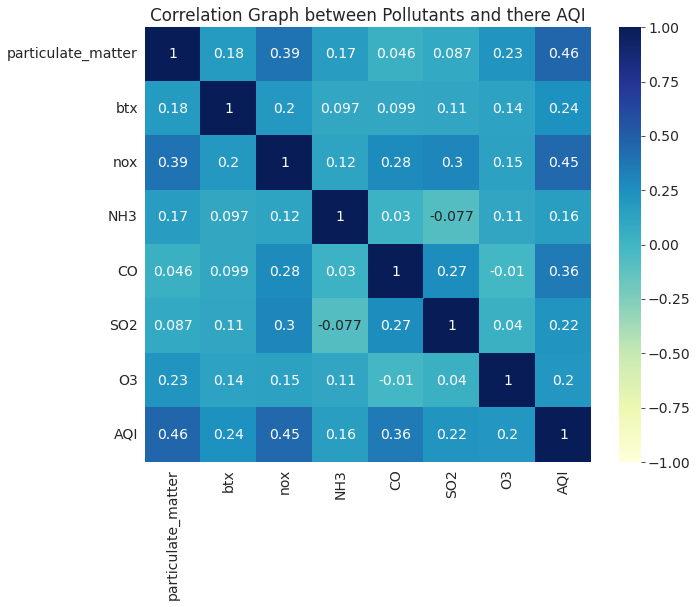

In [29]:
corr_matrix = df.iloc[:,1:10].corr()

fig = plt.figure(figsize = (10, 8))

sns.heatmap(corr_matrix, vmin=-1, vmax=1,annot=True,fmt='.2g',cmap="YlGnBu",)
plt.title('Correlation Graph between Pollutants and there AQI')
plt.show()

**Results & Discussion**

* AQI follows Positively Skewed Distribution, Majority of the AQI values are nearby 100.

* Particulate matter is strongly co-relating AQI then NOX and CO which are according to the weights taken while calculating AQI through various pollutants.

* Other co-relation seems to be of nox and particulate matter, and both are among the major pollutants released by Vehicles , therefore vehicle engines data analysis is to be done for confirming the correlation between the two    

P6 **Give some statistical insight of Quality of air we breathe?**

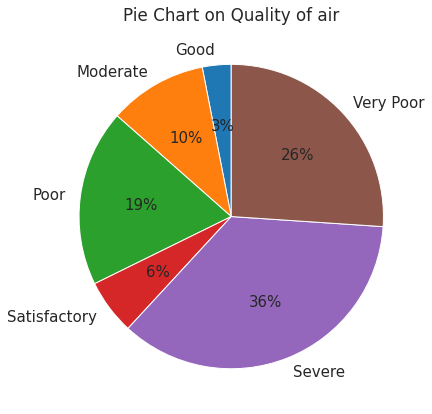

In [31]:
df_pie= df[['AQI_Bucket','AQI']].groupby('AQI_Bucket').mean().reset_index()

AQI_list= df_pie["AQI"].tolist()
bucket_list=df_pie["AQI_Bucket"].tolist()

plt.figure(figsize=(7,7))
plt.pie(AQI_list, labels=bucket_list, startangle=90, autopct='%1.0f%%', 
        textprops={'fontsize': 15})
plt.title('Pie Chart on Quality of air')
plt.show()

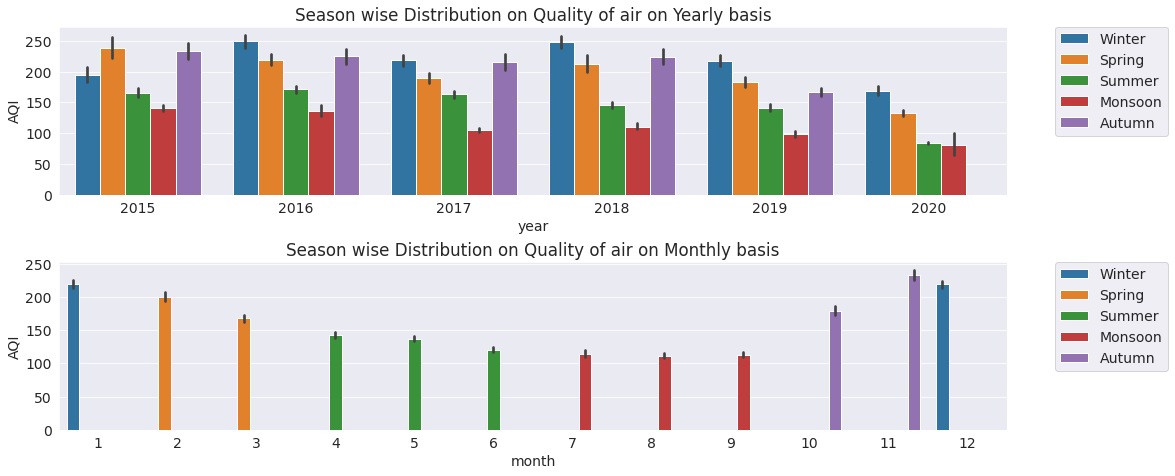

In [32]:
# fig_dims = (16, 6)
# fig, ax = plt.subplots(figsize=fig_dims)

# fig, axes = plt.subplots(2, 1, figsize=(17, 7))

fig, axes = plt.subplots(2, 1,figsize=(17, 7))

sns.barplot(x="year", y="AQI", hue="season", data=df,ax=axes[0]);
axes[0].legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

sns.barplot(x="month", y="AQI", hue="season", data=df,ax=axes[1]);
axes[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

axes[0].set_title("Season wise Distribution on Quality of air on Yearly basis")
axes[1].set_title("Season wise Distribution on Quality of air on Monthly basis")

plt.subplots_adjust(bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)

Text(0.5, 1.0, 'Comparison on Air Quality Acceptability ')

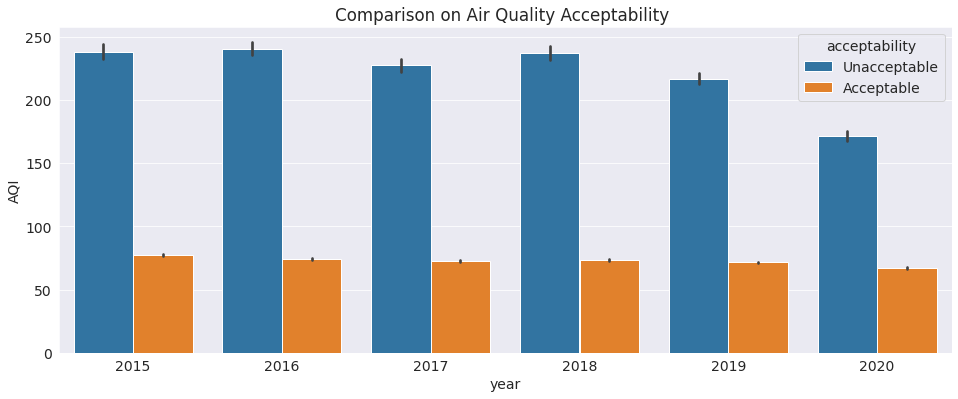

In [33]:
fig_dims = (16, 6)
fig, ax = plt.subplots(figsize=fig_dims)

sns.barplot(x="year", y="AQI", hue="acceptability", data=df,ax=ax);
plt.title('Comparison on Air Quality Acceptability ')

Text(0.5, 1.0, 'Trend of Air Quality on Weekends')

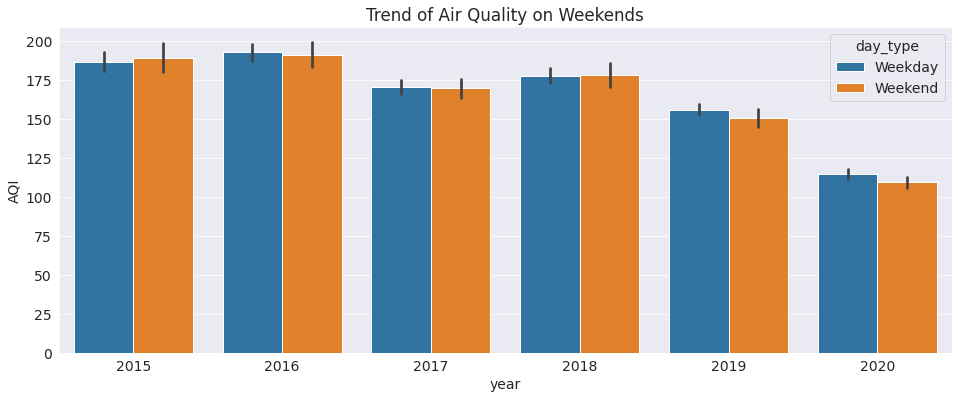

In [34]:
fig_dims = (16, 6)
fig, ax = plt.subplots(figsize=fig_dims)

sns.barplot(x="year", y="AQI", hue="day_type",data=df,ax=ax);
plt.title('Trend of Air Quality on Weekends')

**Results and Discussion**

* Majority of the data we have comes under Severe Condition , i.e 36% of Total, Good & Moderate combinedly is less than 13% and that brings India on top of the list of Most polluted countries

* Monsoon season have least pollution in all of the years, After 2015 Winter pollution increases drastically and currently in winters we have the pollution is all season high.

* According to monthwise data of AQI the trend of pollution is-- Winter>Autumn>Spring>Summer>Monsoon

* According to our data we have most Unacceptable cases in 2016 then 2015 and then 2018

* Average of AQI on Weekends is slightly smaller than weekdays which can be due to less transport. 



P7 **Show Monthwise and Yearwise trend of AQI for top 5 Cities in pollution ?**

Text(0.5, 1.0, 'Yearwise')

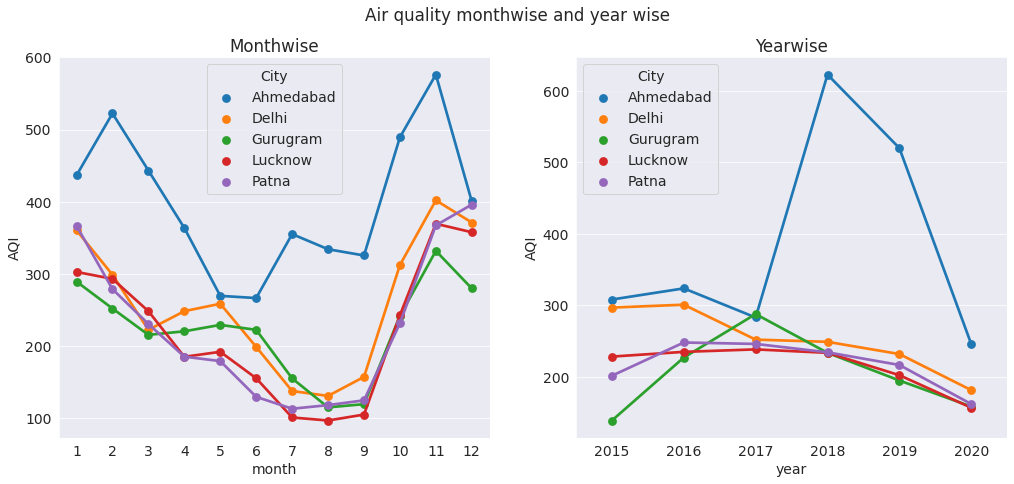

In [35]:
city_polluted=['Ahmedabad','Delhi','Patna','Gurugram','Lucknow']

df_new=df[df.City.isin(city_polluted)]

df_new = df_new.reset_index(drop = True)

df_month= df_new[['City','month','AQI']].groupby(['City','month']).mean().reset_index()

df_year=df_new[['City','year','AQI']].groupby(['City','year']).mean().reset_index()

fig, axes = plt.subplots(1, 2, figsize=(17, 7))
fig.suptitle('Air quality monthwise and year wise')

sns.pointplot(ax=axes[0],data=df_month,x="month", y="AQI",hue='City')


sns.pointplot(ax=axes[1],data=df_year,x="year", y="AQI",hue='City')

axes[0].set_title("Monthwise")
axes[1].set_title("Yearwise")

**Results and Discussions**

* Slope of Patna and Lucknow is highest for September to December i.e in winters these rate of pollution increases suddenly in these cities 

* Ahmedabad have slightly up and down trend but other than this all the cities shows a continously decreasing level of pollution From january to july



P8 **How about AQI variation in a day to get some insight by combining City hour Dataset (ch) taken above , for top 5 cities ?** 

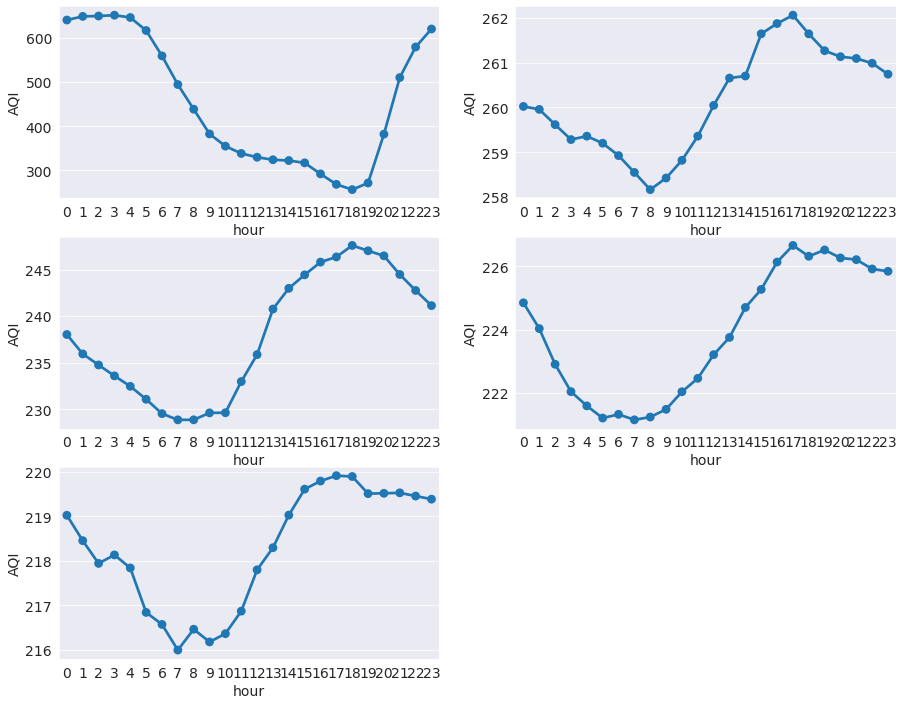

In [71]:
ch['Datetime'] = pd.to_datetime(ch.Datetime)

ch['hour']=pd.DatetimeIndex(ch.Datetime).hour

city_polluted=['Ahmedabad','Delhi','Patna','Gurugram','Lucknow']

fig=plt.figure(figsize=(15,12))

for i,city in enumerate(city_polluted):
    filter=ch[ch['City']==city]
    new_filter= filter[['City','hour','AQI']].groupby(['City','hour']).mean().reset_index()
    fig.add_subplot(3,2,i+1)
    sns.pointplot(x='hour',y='AQI',data=new_filter)






**Results and Discussion**

* Unexpectedly Ahmedabad data shows decrease in trend of air pollution during day time i.e 12:00 hrs to 18:00 hrs which is a point of Doubt and should be further studied in detail But Rest other cities shows increase in trend during daytime as expected which is because of extra rush in cities during this time, along with that till 8:00 hrs in the morning it is at its lowest,**Therefore Morning Walk in necessary for a Healthy Body and a Healthy Mind!!**    

P9 **Show City wise date on AQI and population of the city, to observe any insight out of these two Labels ?**

In [37]:
city_tree=['Ahmedabad','Delhi','Patna','Gurugram','Lucknow','Kolkata','Chennai','Guwhati','Hyderabad']
df_tree=df[['City','year','population_total','effective_literacy_rate_total','AQI']][df.City.isin(city_tree)]
table = pd.pivot_table(df_tree,index=['City','year'],aggfunc=np.mean).reset_index()
table["air-quality"]="Air-Quality"

fig = px.treemap(table, 
                 path=['air-quality','City','year'], 
                 values='AQI',
                 color='population_total',
                 hover_data=['population_total','effective_literacy_rate_total'],
                 color_continuous_scale='RdBu',
                 title='Tree map on AQI and Total Population of the City')
fig.show()


In [38]:
df_scatter=df[['City','year','population_total','effective_literacy_rate_total','AQI']]
df_scat= pd.pivot_table(df_scatter,index=['City','year'],aggfunc=np.mean).reset_index()
df_scat
px.scatter(df_scat, 
           x="population_total", 
           y="AQI", 
           color="City",
           size='AQI', 
           hover_data=['population_total','effective_literacy_rate_total','AQI'],
           title='Scatter plot to showcase AQI,Population and Effective Literacy rate in the city')

**Results and Discussion**

* When we Hover over the Scatplot we see that the cities which have lowest circle radius i.e the lowest AQI are the cities having effective literacy Rate greater than 90 like Aizwal,Shilong,Amravati,Chennai,Mumbai,Kochi,Vishakhapatnam etc. 

* When we Hove Over Tree Map we can see that the Size of Box i.e the amount of Aqi is Higher for Ahmedabad as compared to delhi but the colour represents that population of Delhi is higher than Ahmedabad that means Control of Delhi Pollution Control Boar is better that that of Ahmedabad.

* Similarly Hyderabad population is much higher than Lucknow and Gurugram but is less polluted than both

* Gurugram is the city having least population but amount of pollution is on higher side,Because of too many corporates and industries present in the city

# Imapact of COVID-19 Lockdown on Air Quality

To Visualize and discuss the effects we see on Air Quality when our cties are in Lockdown due to COVID-19 in which major Industries, Markets, Movement of Transport and personal Vehicles are at Hault , Did this brings some postive impact on air Quality??  

1. **Quality of Air before Lockdown year**

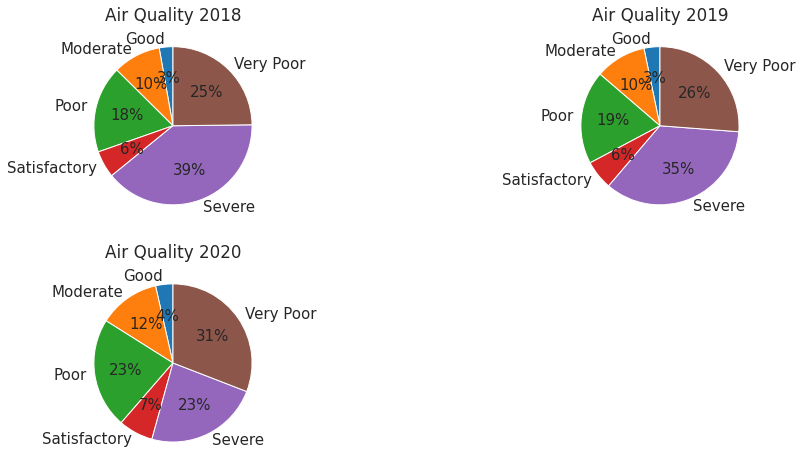

In [39]:
df_pie= df[['year','AQI_Bucket','AQI']].groupby(['year','AQI_Bucket']).mean().reset_index()

df_2018=df_pie[df_pie.year==2018]
df_2019=df_pie[df_pie.year==2019]
df_2020=df_pie[df_pie.year==2020]

AQI_list_2018= df_2018["AQI"].tolist()
bucket_list_2018=df_2018["AQI_Bucket"].tolist()

AQI_list_2019= df_2019["AQI"].tolist()
bucket_list_2019=df_2019["AQI_Bucket"].tolist()

AQI_list_2020= df_2020["AQI"].tolist()
bucket_list_2020=df_2020["AQI_Bucket"].tolist()

fig = plt.figure(figsize=(16,8))

ax1 = plt.subplot2grid((2,2),(0,0))
plt.pie(AQI_list_2018, labels=bucket_list_2018, startangle=90, autopct='%1.0f%%', 
          textprops={'fontsize': 15})
plt.title('Air Quality 2018')

ax2 = plt.subplot2grid((2,2),(0,1))
plt.pie(AQI_list_2019, labels=bucket_list_2019, startangle=90, autopct='%1.0f%%', 
          textprops={'fontsize': 15})
plt.title('Air Quality 2019')

ax3 = plt.subplot2grid((2,2),(1,0))
plt.pie(AQI_list_2020, labels=bucket_list_2020, startangle=90, autopct='%1.0f%%', 
          textprops={'fontsize':15})
plt.title('Air Quality 2020')


plt.show()

2. **Compare Pollution level in Cities during Lockdown Period in 2020 and Normal Period in 2019 on the same Dates i.e from 26th March to 15th June for both 2019 and 2020**



Text(0.5, 1.0, 'Condition Before and After Lockdown in March to June Month')

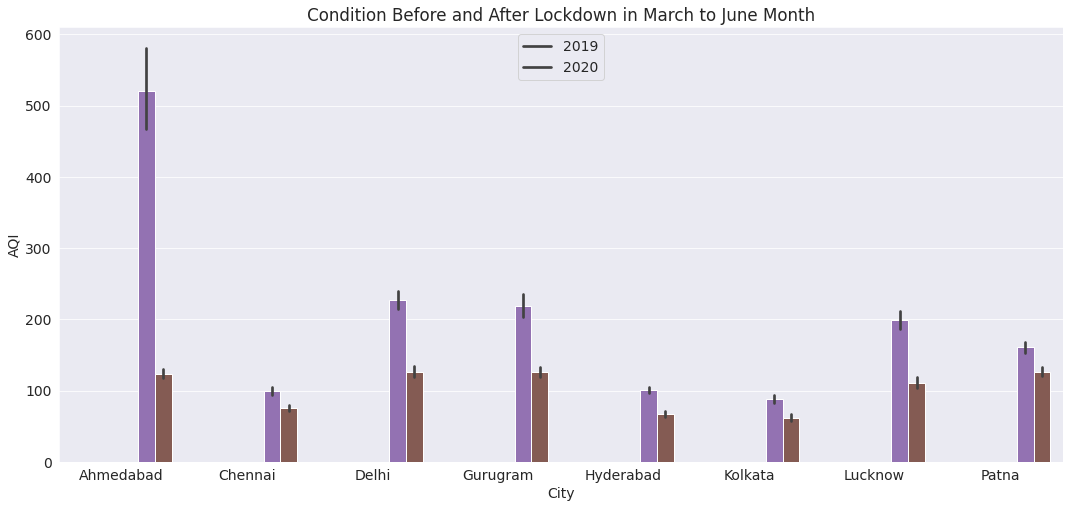

In [40]:
df_dates = df.set_index(['Date'])
df_beforeLockdown=df_dates.loc['2019-03-26':'2019-06-15'].reset_index()
df_afterLockdown=df_dates.loc['2020-03-26':'2020-06-15'].reset_index()

df_covidEffect=pd.concat([df_beforeLockdown, df_afterLockdown], axis=0)

df_covidEffect=df_covidEffect[df_covidEffect.City.isin(city_tree)]

plt.figure(figsize=(18,8))
sns.barplot(x='City', y='AQI', hue='year', data=df_covidEffect);
plt.legend(['2019', '2020']);
plt.title('Condition Before and After Lockdown in March to June Month')

3. **Comparison of Different Pollutants present in the atmosphere, Before and after Lockdown**



In [41]:
df_delhi= df_covidEffect[df_covidEffect.City=='Delhi']
df_ahmedabad= df_covidEffect[df_covidEffect.City=='Ahmedabad']

Text(0.5, 1.0, 'NH3')

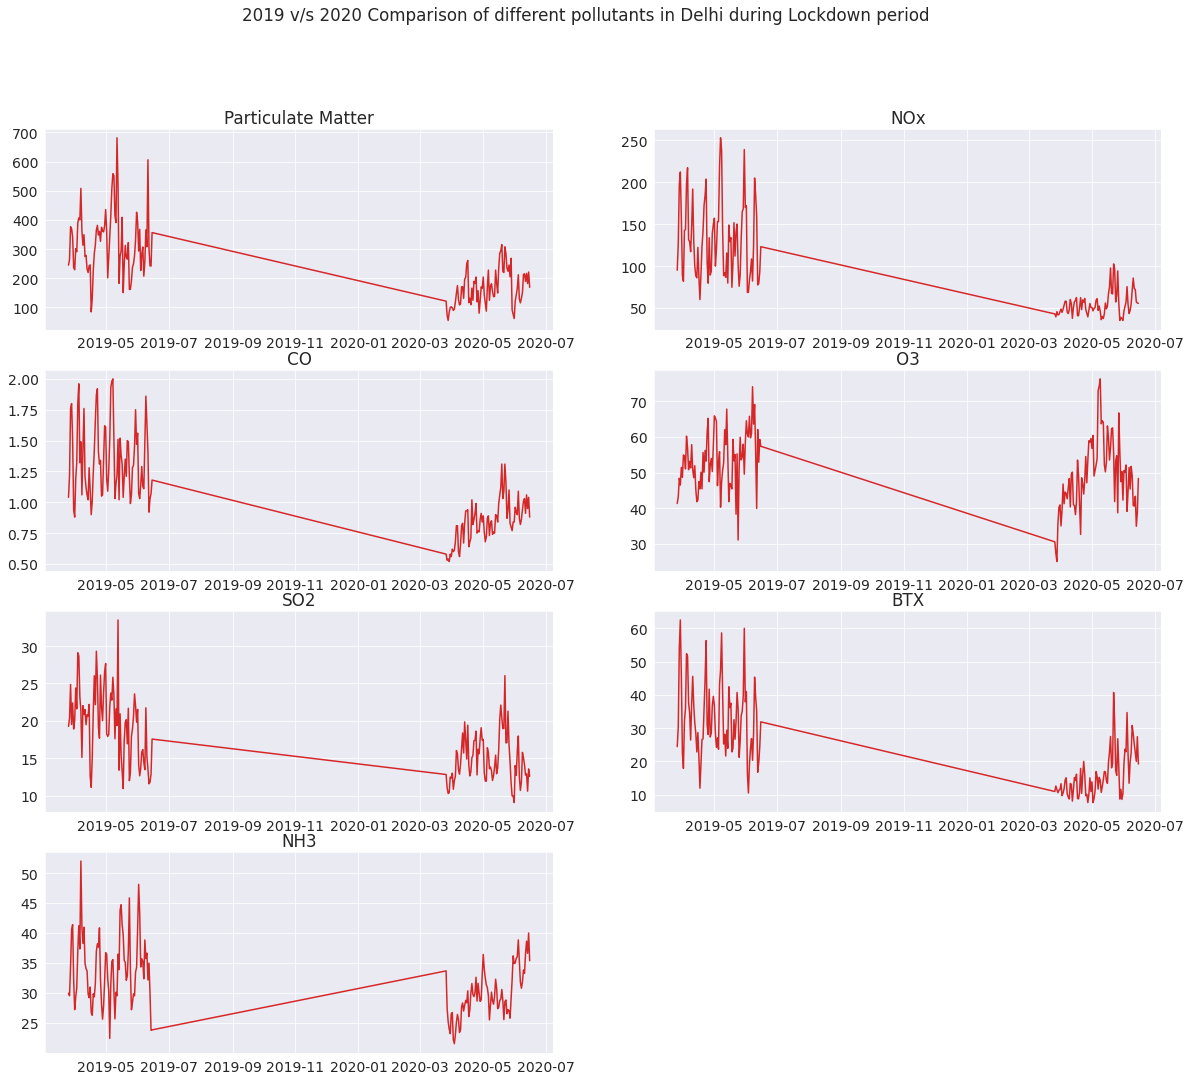

In [42]:
fig=plt.figure(figsize=(20,17))
plt.suptitle('2019 v/s 2020 Comparison of different pollutants in Delhi during Lockdown period')

fig.add_subplot(4,2,1)
plt.plot('Date', 'particulate_matter', data=df_delhi, color='tab:red')
plt.title('Particulate Matter')


fig.add_subplot(4,2,2)
plt.plot('Date', 'nox', data=df_delhi, color='tab:red')
plt.title('NOx')

fig.add_subplot(4,2,3)
plt.plot('Date', 'CO', data=df_delhi, color='tab:red')
plt.title('CO')

fig.add_subplot(4,2,4)
plt.plot('Date', 'O3', data=df_delhi, color='tab:red')
plt.title('O3')

fig.add_subplot(4,2,5)
plt.plot('Date', 'SO2', data=df_delhi, color='tab:red')
plt.title('SO2')

fig.add_subplot(4,2,6)
plt.plot('Date', 'btx', data=df_delhi, color='tab:red')
plt.title('BTX')

fig.add_subplot(4,2,7)
plt.plot('Date', 'NH3', data=df_delhi, color='tab:red')
plt.title('NH3')

Text(0.5, 1.0, 'NH3')

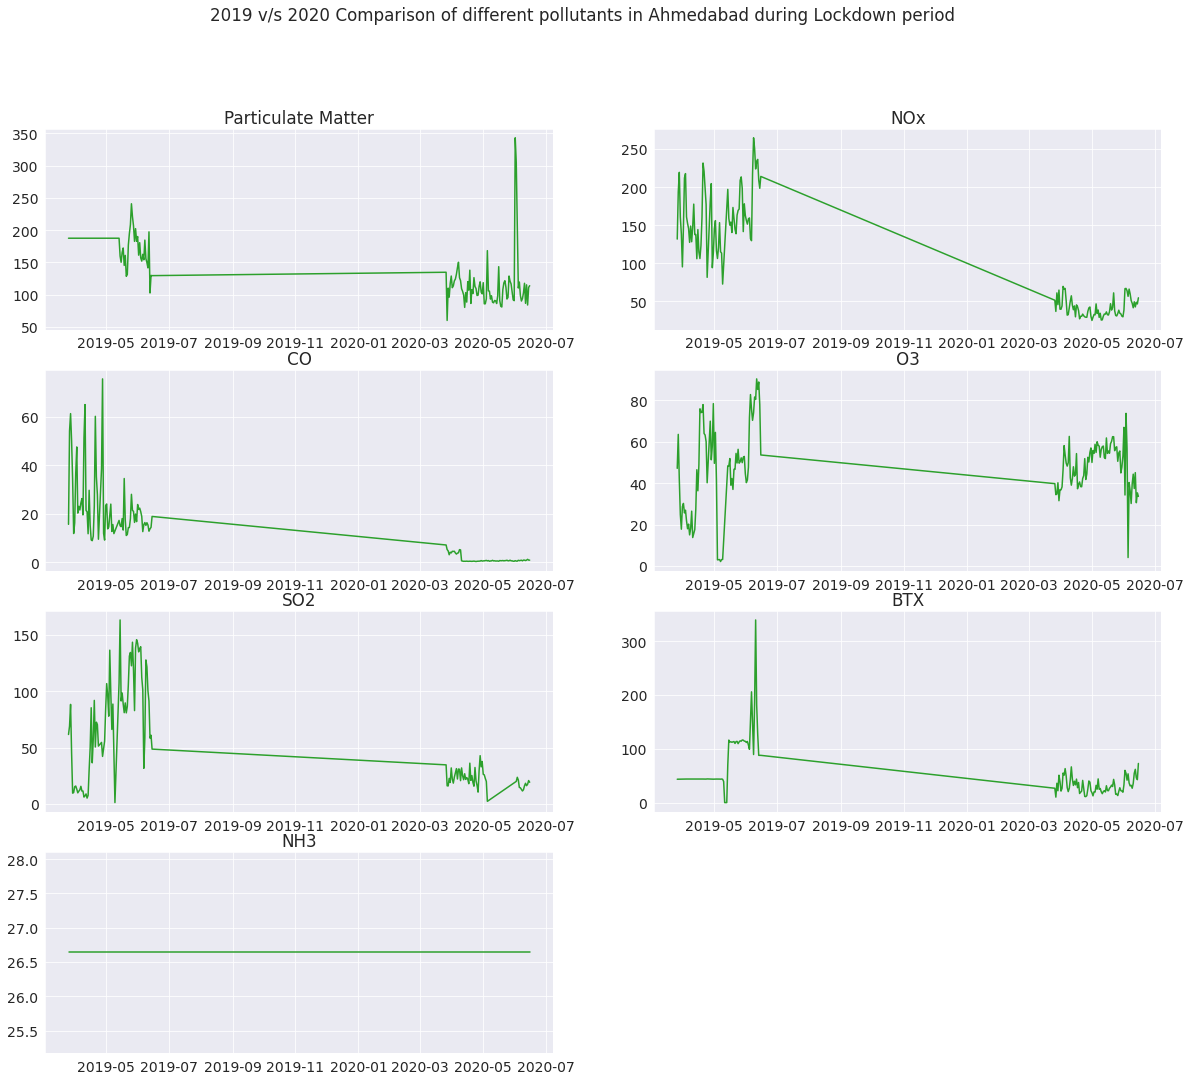

In [43]:
fig=plt.figure(figsize=(20,17))
plt.suptitle('2019 v/s 2020 Comparison of different pollutants in Ahmedabad during Lockdown period ')

fig.add_subplot(4,2,1)
plt.plot('Date', 'particulate_matter', data=df_ahmedabad, color='tab:green')
plt.title('Particulate Matter')

fig.add_subplot(4,2,2)
plt.plot('Date', 'nox', data=df_ahmedabad, color='tab:green')
plt.title('NOx')

fig.add_subplot(4,2,3)
plt.plot('Date', 'CO', data=df_ahmedabad, color='tab:green')
plt.title('CO')

fig.add_subplot(4,2,4)
plt.plot('Date', 'O3', data=df_ahmedabad, color='tab:green')
plt.title('O3')

fig.add_subplot(4,2,5)
plt.plot('Date', 'SO2', data=df_ahmedabad, color='tab:green')
plt.title('SO2')

fig.add_subplot(4,2,6)
plt.plot('Date', 'btx', data=df_ahmedabad, color='tab:green')
plt.title('BTX')

fig.add_subplot(4,2,7)
plt.plot('Date', 'NH3', data=df_ahmedabad, color='tab:green')
plt.title('NH3')

**Results and Discussion**

* Severe Condition Drastically Reduced from 35% to 23% and now comes under Very poor(increase from 26% to 31%.) and poor Category (increase from 19% to 23%).

* Ahmedabad has unexpectedly highest reduction in pollution during Covid period which signifies that the most of the readings for ahmedabad are from the station which are nearby Industrial Area ,Beacause during Covid all the industries were closed and a Major Chunk of pollution drastically reduced.

* All the Pollutants have a decreasing Trend during Lockdown Period, except BTX(nearby same) , which directly helped in improving our AQI .

# **How Big the Concern is ??**

To Showcase our Concern , I extracted Yearwise Deaths in Delhi Due to Air pollution from GBD Compare Website -- ( https://vizhub.healthdata.org/gbd-compare/india)    



In [45]:
path='/content/Deaths.xlsx'
deaths_inDelhi=pd.read_excel(path)

deaths_inDelhi.head(5)

,Location,Year,Age,Sex,Cause of death or injury,Risk factor,Measure,Value,Lower bound,Upper bound
0,Delhi,2015,All ages,Both,Other non-communicable diseases,Particulate matter pollution,Deaths,1.560455,0.459223,3.170245
1,Delhi,2015,All ages,Both,Diabetes and kidney diseases,Particulate matter pollution,Deaths,662.278205,448.553792,928.000718
2,Delhi,2015,All ages,Both,Chronic respiratory diseases,Ambient ozone pollution,Deaths,997.809220,451.140138,1605.060307
3,Delhi,2015,All ages,Both,Chronic respiratory diseases,Particulate matter pollution,Deaths,3380.884869,2342.340864,4149.200126
4,Delhi,2015,All ages,Both,Cardiovascular diseases,Particulate matter pollution,Deaths,7589.388086,6777.014669,8493.339941


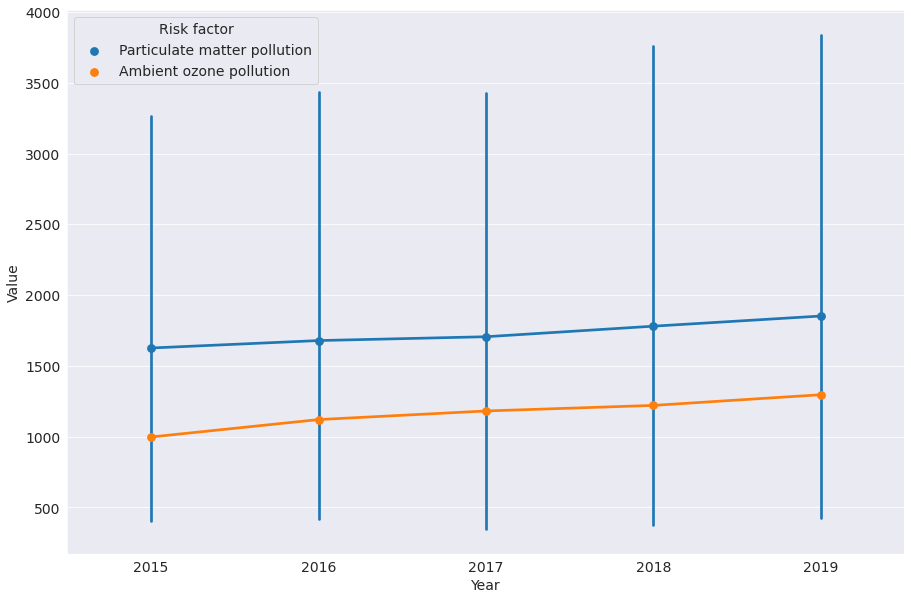

In [46]:
fig=plt.figure(figsize=(15,10))
sns.pointplot(x='Year',y='Value',hue='Risk factor',data=deaths_inDelhi)

**Results and Discussion**

* As we can see On an **Average Deaths due to Particulate Matter Increased from 1600 in 2015 to 1900 in 2019 i.e increament of 18.75% in 4 years that means approximately Death rate is increasing with 4.5% each Year** , Such a huge increase in Death Rate explains the amount of seriousness required by us along with the government otherwise the consequenses can be Hazardous and uncontrollable

* Similarly **Deaths due to Ozone pollution increase from 1000 in 2015 to 1300 in 2019 i.e increament of 30% in 4 years and nearby 8% every Year**.

### Last But not the least-- This is the correct time to stand together and fight against this Poisonous  Pollution  so that we can maintain the Honour of the "INCREDIBLE INDIA" and save our people.  


## **Future Work**

* All the Government Schemes such as National Air Quality Program etc. can be tracked using this datasets for Current year , Any Improvement in Air Quality in nearby area of sheme holders shows the effectiveness of that work.

* More intensive analysis can be done on this dataset to calculate how much investment should be done in specific cities to combat Air pollution by keeping in mind the Population, Literacy Rate, Economy Contribution, Child-Adult Ratioetc..     

* Data of Air Quality can be merged with Data of Pollution Created by Vehicles on road and Analysis can be done on the Type of vehicles which have strong correlation with AQI so that Further reasearch can be done on Engines of those specific Vehicles .





**Refferences**

* https://jovian.ai/learn/zero-to-data-analyst-bootcamp/lesson/exploratory-data-analysis-case-study

* https://www.kaggle.com/parulpandey/breathe-india-covid-19-effect-on-pollution

* https://www.kaggle.com/rohanrao/air-quality-data-in-india

* https://jovian.ai/learn/zero-to-data-analyst-bootcamp/lesson/visualization-with-matplotlib-and-seaborn



**To Study Inferences and Conclusion made, Just Scroll below the specific Visualizations where all the Results and Discussions are explained**

In [47]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/dwivedi-rishabh95/analysis-on-quality-of-air-and-how-it-affected-during-lockdown


'https://jovian.ai/dwivedi-rishabh95/analysis-on-quality-of-air-and-how-it-affected-during-lockdown'